# Практическая работа 1 - Упражнение 3.
Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы (при отсутствии доступа к Порталу https://rosstat.gov.ru/) .

Выявить показатели в наборе данных (на основании упражнения 1.1.).

Вариант 5: Трудоустройство

In [1]:
import pandas as pd
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint
import re
import requests

In [2]:
api_url = 'https://apidata.mos.ru/v1/datasets/1362/features?api_key=079dd1c5-bbd2-4db8-8419-2ae029f87ac8'

In [3]:
response = requests.get(api_url)

In [4]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


In [5]:
headers = {'Accept': 'application/json'}

try:
    response = requests.get(api_url, headers=headers)
    response.raise_for_status()  # Проверяем статус код ответа

    if response.status_code == 200:
        json_data = response.json()
        features = json_data.get('features', [])
        df = pd.json_normalize(features)
    else:
        print('Запрос вернул статус:', response.status_code)

except requests.exceptions.RequestException as e:
    print(f"Ошибка при выполнении запроса: {e}")

In [6]:
df.head(15)

,type,geometry.coordinates,geometry.type,properties.datasetId,properties.attributes.is_deleted,properties.attributes.Prof,properties.attributes.Number,properties.attributes.global_id,properties.attributes.Date,properties.attributes.CountVacancy,...,properties.attributes. InterviewPlaceLocationUNOM,properties.attributes.WorkPlaceNote,properties.attributes.FullName,properties.attributes.ContactName,properties.attributes.Phone,properties.attributes.Email,properties.attributes.WorkPlaceLocationUNOM,properties.rowId,properties.versionNumber,properties.releaseNumber
0,Feature,"[37.562024975, 55.781339583]",Point,1362,0,Врач-гастроэнтеролог,18700009/2198,1132127583,06.07.2021,2,...,,,Акционерное общество Группа компаний Медси,Шуткова София Николаевна,(495) 737-07-93 доб. 12067,shutkova.sn@medsigroup.ru,,None,5,2271
1,Feature,"[37.562024975, 55.781339583]",Point,1362,0,Врач-аллерголог-иммунолог,18700017/2198,1132127647,06.07.2021,2,...,,,Акционерное общество Группа компаний Медси,Шуткова София Николаевна,(495) 737-07-93 доб. 12067,shutkova.sn@medsigroup.ru,,None,5,2271
2,Feature,"[37.562024975, 55.781339583]",Point,1362,0,Врач-терапевт,18700013/2198,1132278396,06.07.2021,2,...,,,Акционерное общество Группа компаний Медси,Шуткова София Николаевна,(495) 737-07-93 доб. 12067,shutkova.sn@medsigroup.ru,,None,5,2271
3,Feature,"[37.562024975, 55.781339583]",Point,1362,0,Врач-инфекционист,18700019/2198,1132748325,06.07.2021,2,...,,,Акционерное общество Группа компаний Медси,Шуткова София Николаевна,(495) 737-07-93 доб. 12067,shutkova.sn@medsigroup.ru,,None,5,2271
4,Feature,"[37.632609213, 55.643266616]",Point,1362,0,Грузчик,21800055/2198,1136565989,06.08.2021,3,...,,,Общество с ограниченной ответственностью Торго...,Шакирова Надежда Юрьевна,(495) 941-92-74,nshakirova@mosmpz.ru,,None,5,2271
5,Feature,"[37.450937133, 55.686235666]",Point,1362,0,Инженер,22500009/2198,1137181213,13.08.2021,10,...,,,Акционерное общество Пик-Индустрия,Княжева Галина Анатольевна,(495) 741-06-92 доб. 4167,knyzhevaga@pik-industry.ru,,None,5,2271
6,Feature,"[37.64984686, 55.746837878]",Point,1362,0,Врач-анестезиолог-реаниматолог,22900130/2198,1138967092,17.08.2021,1,...,,,Государственное бюджетное учреждение здравоохр...,Уральский Евгений Александрович,(985) 360-03-46,uralskiyea@zdrav.mos.ru,,None,5,2271
7,Feature,"[37.286697918, 55.606973401]",Point,1362,0,Агент,23000140/2198,1138975201,18.08.2021,17,...,,,Акционерное общество Ю-Ти-Джи,Ульянич Людмила Владимировна,(495) 744-01-07 доб. 143,Ludmila.uljanich@utg.group,,None,5,2271
8,Feature,"[37.562024975, 55.781339583]",Point,1362,0,Врач-офтальмолог,23200066/2198,1139021353,20.08.2021,4,...,,,Акционерное общество Группа компаний Медси,Шуткова София Николаевна,(495) 737-07-93 доб. 12067,shutkova.sn@medsigroup.ru,,None,5,2271
9,Feature,"[37.562024975, 55.781339583]",Point,1362,0,Врач-детский хирург,23200061/2198,1139021360,20.08.2021,2,...,,,Акционерное общество Группа компаний Медси,Шуткова София Николаевна,(495) 737-07-93 доб. 12067,shutkova.sn@medsigroup.ru,,None,5,2271


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 39 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   type                                               490 non-null    object 
 1   geometry.coordinates                               490 non-null    object 
 2   geometry.type                                      490 non-null    object 
 3   properties.datasetId                               490 non-null    int64  
 4   properties.attributes.is_deleted                   490 non-null    int64  
 5   properties.attributes.Prof                         490 non-null    object 
 6   properties.attributes.Number                       490 non-null    object 
 7   properties.attributes.global_id                    490 non-null    int64  
 8   properties.attributes.Date                         490 non-null    object 
 9   properties

In [8]:
import pandas as pd

# предположим, что df - ваш исходный DataFrame
# columns_to_keep - список названий столбцов, которые вы хотите оставить
columns_to_keep=['properties.attributes.Prof',
                 'properties.attributes.CountVacancy',
                 'properties.attributes.MinZarplat',
                 'properties.attributes.MaxZarplat',
                 'properties.attributes.WorkRegim',
                 'properties.attributes.WorkPlaceAdmArea']
new_df = df[columns_to_keep]

In [9]:
new_df.head(10)

,properties.attributes.Prof,properties.attributes.CountVacancy,properties.attributes.MinZarplat,properties.attributes.MaxZarplat,properties.attributes.WorkRegim,properties.attributes.WorkPlaceAdmArea
0,Врач-гастроэнтеролог,2,100000,100000.0,график сменности,Северный административный округ
1,Врач-аллерголог-иммунолог,2,110000,110000.0,график сменности,Северный административный округ
2,Врач-терапевт,2,120000,120000.0,график сменности,Северный административный округ
3,Врач-инфекционист,2,100000,100000.0,график сменности,Северный административный округ
4,Грузчик,3,35000,35000.0,график сменности,Южный административный округ
5,Инженер,10,52000,52000.0,пятидневная рабочая неделя,Западный административный округ
6,Врач-анестезиолог-реаниматолог,1,100000,120000.0,сутки через двое,Центральный административный округ
7,Агент,17,20589,20589.0,график сменности,Западный административный округ
8,Врач-офтальмолог,4,90000,90000.0,график сменности,Северный административный округ
9,Врач-детский хирург,2,120000,120000.0,график сменности,Северный административный округ


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   properties.attributes.Prof              490 non-null    object 
 1   properties.attributes.CountVacancy      490 non-null    int64  
 2   properties.attributes.MinZarplat        490 non-null    int64  
 3   properties.attributes.MaxZarplat        488 non-null    float64
 4   properties.attributes.WorkRegim         490 non-null    object 
 5   properties.attributes.WorkPlaceAdmArea  490 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 23.1+ KB


In [11]:
new_df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)
new_df['MinZarplat'] = new_df['MinZarplat'].astype(float)
new_df.dropna(inplace=True)

C:\Users\Bashk\AppData\Local\Temp\ipykernel_18784\3580494697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)
C:\Users\Bashk\AppData\Local\Temp\ipykernel_18784\3580494697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['MinZarplat'] = new_df['MinZarplat'].astype(float)
C:\Users\Bashk\AppData\Local\Temp\ipykernel_18784\3580494697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [12]:
new_df

,Prof,CountVacancy,MinZarplat,MaxZarplat,WorkRegim,WorkPlaceAdmArea
0,Врач-гастроэнтеролог,2,100000.0,100000.0,график сменности,Северный административный округ
1,Врач-аллерголог-иммунолог,2,110000.0,110000.0,график сменности,Северный административный округ
2,Врач-терапевт,2,120000.0,120000.0,график сменности,Северный административный округ
3,Врач-инфекционист,2,100000.0,100000.0,график сменности,Северный административный округ
4,Грузчик,3,35000.0,35000.0,график сменности,Южный административный округ
...,...,...,...,...,...,...
485,Специалист,2,130000.0,130000.0,пятидневная рабочая неделя,Южный административный округ
486,Уборщик территорий,1,25900.0,25900.0,пятидневная рабочая неделя,Южный административный округ
487,Инженер,1,50000.0,65000.0,пятидневная рабочая неделя,Центральный административный округ
488,Уборщик территорий,2,45000.0,52000.0,пятидневная рабочая неделя,Южный административный округ


In [13]:
pivot_table = new_df.pivot_table(index='WorkPlaceAdmArea', values=['MinZarplat', 'MaxZarplat','Prof'], aggfunc={'MinZarplat': 'mean', 'MaxZarplat': 'mean','Prof': 'count'}).reset_index()
pivot_table

,WorkPlaceAdmArea,MaxZarplat,MinZarplat,Prof
0,Восточный административный округ,49806.964286,45661.964286,28
1,Западный административный округ,52690.606061,48211.818182,33
2,Зеленоградский административный округ,59000.000000,51600.000000,5
3,Новомосковский административный округ,71175.757576,56236.363636,33
4,Северный административный округ,64793.462687,60517.194030,67
5,Северо-Восточный административный округ,48355.175000,39075.750000,40
6,Северо-Западный административный округ,52444.347826,44039.521739,23
7,Троицкий административный округ,43878.090909,37709.545455,22
8,Центральный административный округ,56864.598039,49605.911765,102
9,Юго-Восточный административный округ,49753.178571,43851.535714,28


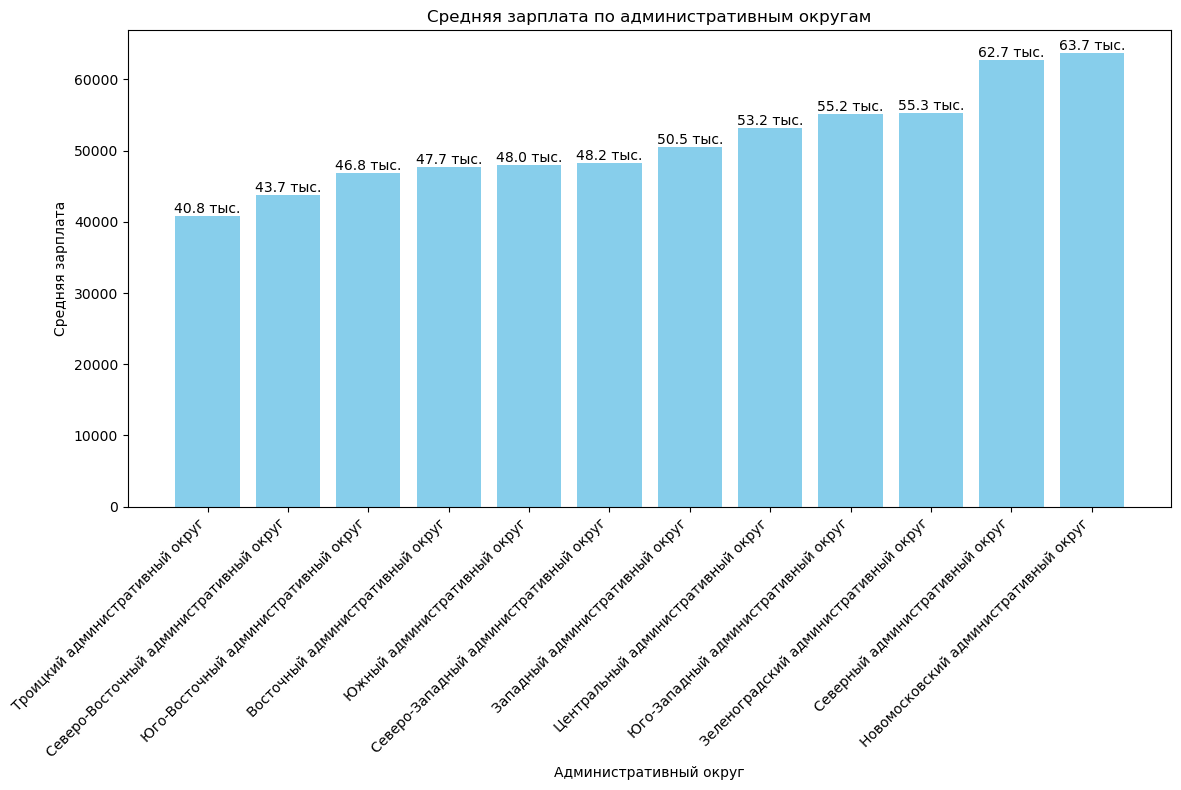

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pivot_table['СредняяЗарплата'] = (pivot_table['MaxZarplat'] + pivot_table['MinZarplat']) / 2
pivot_table_sorted = pivot_table.sort_values('СредняяЗарплата')

plt.figure(figsize=(12, 8))
bars = plt.bar(pivot_table_sorted['WorkPlaceAdmArea'], pivot_table_sorted['СредняяЗарплата'], color='skyblue')
plt.xlabel('Административный округ')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата по административным округам')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, '{:.1f} тыс.'.format(yval/1000), ha='center', va='bottom')

plt.tight_layout()
plt.show()